# Capstone 1 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import spatial
import capstone1_funcs as cs1
import seaborn as sns
import matplotlib.style as style
%matplotlib inline

### Import CSV

In [2]:
init_df = pd.read_csv('/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/music2/SpotifyAudioFeaturesApril2019.csv')

In [3]:
init_df.head(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,0


In [4]:
init_df.shape

(130663, 17)

### If there are any duplicate songs, they need to be removed

In [5]:
cs1.drop_duplicates(init_df)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


#### There does not appear to be any duplicate artist/song data

### The format of duration_ms is a bit hard to read.  Convert ms to seconds

In [6]:
cs1.time_ms_to_sec(init_df)

### There is now a new time_seconds column which is easier to interpret

In [7]:
init_df.head()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),214,0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,125,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,124,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [8]:
init_df.shape

(130663, 17)

### Check the data for any NaN values

In [9]:
cols_list = ['track_id', 'track_name', 'time_seconds', 'acousticness', 'danceability', 
             'energy', 'instrumentalness', 'key', 'liveness', 
             'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
             'valence', 'popularity']

In [10]:
cs1.check_for_nans(init_df, cols_list)

NaNs in track_id: 0
NaNs in track_name: 0
NaNs in time_seconds: 0
NaNs in acousticness: 0
NaNs in danceability: 0
NaNs in energy: 0
NaNs in instrumentalness: 0
NaNs in key: 0
NaNs in liveness: 0
NaNs in loudness: 0
NaNs in mode: 0
NaNs in speechiness: 0
NaNs in tempo: 0
NaNs in time_signature: 0
NaNs in valence: 0
NaNs in popularity: 0


### Drop specific columns

#### Instrumentalness, speechiness, time_signature, key, and mode columns will be removed

In [11]:
cols_to_drop = ['instrumentalness', 'speechiness', 'time_signature', 'key', 'mode']

In [12]:
cs1.drop_columns(init_df, cols_to_drop)

#### Rows containing a 0 or 1 popularity rating will be removed

In [13]:
mask_above_1 = init_df['popularity'] >= 2
mask_0 = init_df['popularity'] < 2

In [14]:
df = init_df.copy()[mask_above_1]
df_0 = init_df.copy()[mask_0]

In [15]:
print(f'Removed {df_0.shape[0]} rows')

Removed 22106 rows


In [16]:
print(f'There are now {df.shape[0]} rows remaining')

There are now 108557 rows remaining


### Gain a general understanding of the data and how it's distributed

In [17]:
style.use('ggplot')
sns.set_palette('Blues_r', n_colors=9)

In [18]:
attribute_list = ['time_seconds', 'acousticness', 'danceability', 
                  'energy', 'liveness', 'loudness', 'tempo', 
                  'valence', 'popularity']

''

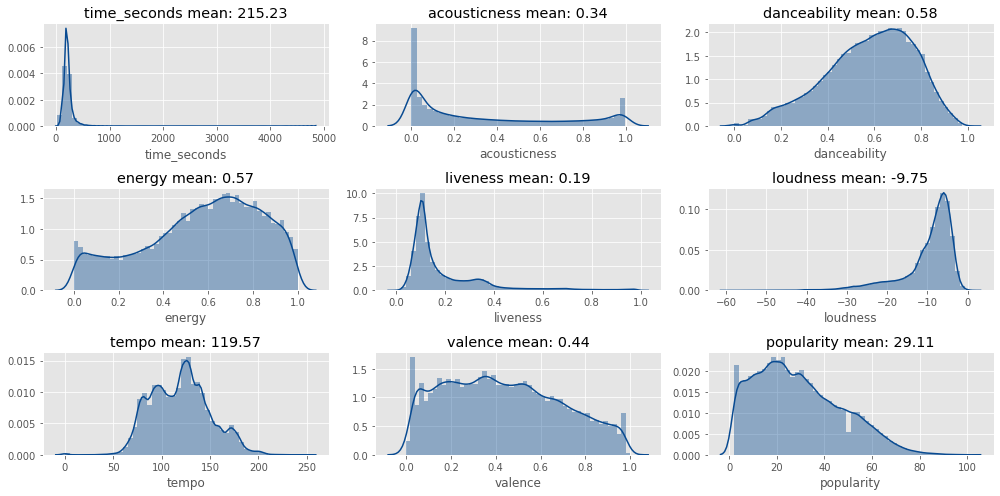

In [19]:
fig, axs = plt.subplots(3,3, figsize=(14,7))
for ax, att in zip(axs.flatten(), attribute_list):
    cs1.plot_hist_and_means(ax, df, att)
fig.tight_layout()
# plt.savefig(f'attribute_dists.png', format='png') 
;

#### I wanted to examine the relationship between a few of the attributes through the use of a scatter matrix

''

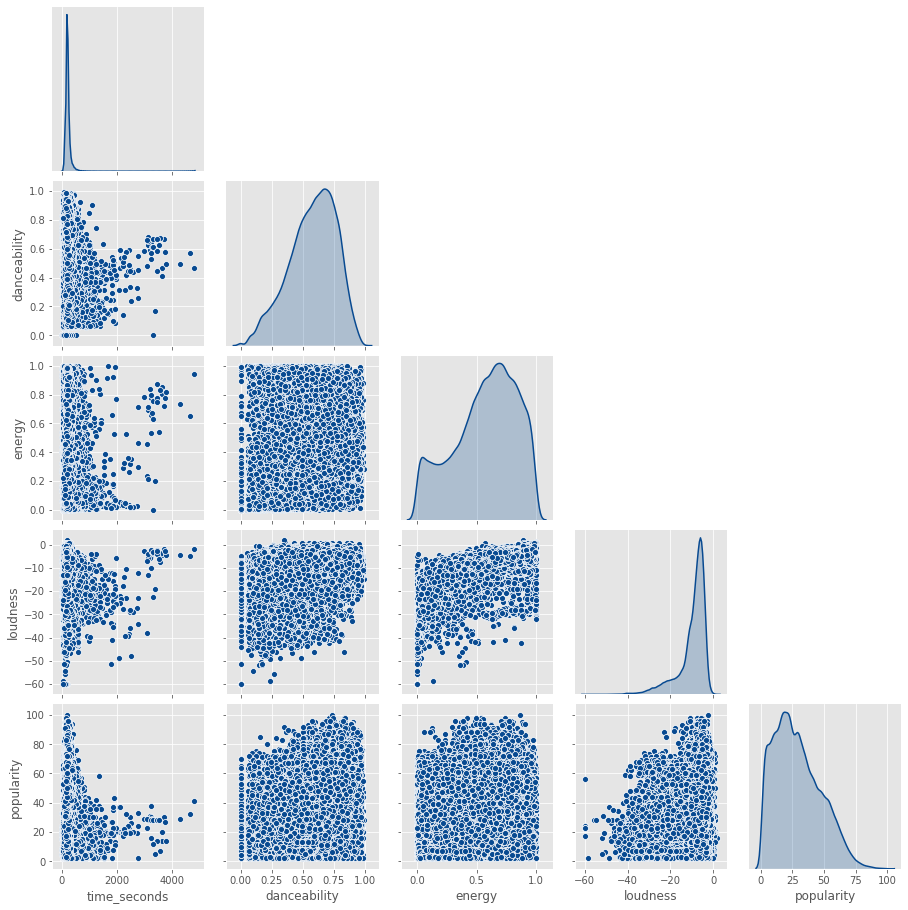

In [20]:
attributes = ['time_seconds', 'danceability', 'energy', 'loudness', 'popularity']
sns.pairplot(df[attributes], diag_kind="kde", corner=True)
# plt.savefig(f'scatter_matrix.png', format='png')
;

### Group together songs by similar popularity rating into subsets.

#### Out of the 108,557 total songs in the dataframe, I decided that the top 0.13% of these could be classified as the most popular of the dataset with a popularity over 86.  The remaining songs were distrubuted fairly evenly between 7 more subsets.

In [21]:
popularity = df.copy().sort_values('popularity', ascending=False)

#### Top 10 songs

In [22]:
popularity.head(10)

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
99393,Daddy Yankee,5w9c2J52mkdntKOmRLeM2m,Con Calma,193,0.1100,0.737,0.860,0.0574,-2.652,93.989,0.656,100
99366,Jonas Brothers,4y3OI86AEP6PQoDE6olYhO,Sucker,181,0.0427,0.842,0.734,0.1060,-5.065,137.958,0.952,98
99368,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,bad guy,194,0.3080,0.708,0.418,0.1000,-10.998,131.926,0.578,98
123909,Post Malone,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,158,0.5200,0.744,0.494,0.0716,-5.563,89.972,0.927,98
99364,Post Malone,6MWtB6iiXyIwun0YzU6DFP,Wow.,149,0.1630,0.833,0.539,0.1010,-7.399,99.947,0.385,98
99365,Ariana Grande,4kV4N9D1iKVxx1KLvtTpjS,"break up with your girlfriend, i'm bored",190,0.0421,0.726,0.554,0.1060,-5.290,169.999,0.335,97
124042,Lady Gaga,2VxeLyX666F8uXCJ0dZF8B,Shallow,215,0.3710,0.572,0.385,0.2310,-6.362,95.799,0.323,96
99372,Ariana Grande,14msK75pk3pA33pzPVNtBF,7 rings,178,0.5780,0.725,0.321,0.0884,-10.744,70.142,0.319,96
99375,Sam Smith,6Qs4SXO9dwPj5GKvVOv8Ki,Dancing With A Stranger (with Normani),171,0.4500,0.741,0.520,0.2220,-7.513,102.998,0.347,96
124340,Pedro Capó,5iwz1NiezX7WWjnCgY5TH4,Calma - Remix,238,0.3230,0.826,0.773,0.1430,-4.218,126.899,0.761,96


In [ ]:
def divide_df(df_, column, h_thresh, l_thresh, sub_sets):
    '''
    df_: dataframe
    column: attribute to orde by
    h_thresh(float):
    l_thresh(float):
    sub_sets(int): number of total 
    subsets to divide to, including h_thresh and l_thresh
    '''
    for i, 

### Create masks to separate songs into subsets.
#### The song's were separated as follows:
- Greater than 86
- Between 52 and 87
- Between 41 and 52
- Between 33 and 41
- Between 26 and 33
- Between 20 and 26
- Between 14 and 20
- Between 7 and 14
- Between 1 and 7

In [23]:
mask_86 = popularity['popularity'] > 86
mask_52 = (popularity['popularity'] > 52) & (popularity['popularity'] <= 86)
mask_41 = (popularity['popularity'] > 41) & (popularity['popularity'] <= 52)
mask_33 = (popularity['popularity'] > 33) & (popularity['popularity'] <= 41)
mask_26 = (popularity['popularity'] > 26) & (popularity['popularity'] <= 33)
mask_20 = (popularity['popularity'] > 20) & (popularity['popularity'] <= 26)
mask_14 = (popularity['popularity'] > 14) & (popularity['popularity'] <= 20)
mask_7 = (popularity['popularity'] > 7) & (popularity['popularity'] <= 14)
mask_1 = (popularity['popularity'] > 1) & (popularity['popularity'] <= 7)

mask_below_86 = (popularity['popularity'] <= 86) & (popularity['popularity'] > 1)

### Apply masks to create new dataframes to work with

In [24]:
df_86 = popularity[mask_86]
df_52 = popularity[mask_52]
df_41 = popularity[mask_41]
df_33 = popularity[mask_33]
df_26 = popularity[mask_26]
df_20 = popularity[mask_20]
df_14 = popularity[mask_14]
df_7 = popularity[mask_7]
df_1 = popularity[mask_1]

df_below_86 = popularity[mask_below_86]

### mask_86 is about 0.13% of the total data

In [25]:
f'{round(((len(df_86) / len(df)) * 100), 3)} %'

'0.127 %'

### New dataframe totals and percents of total data

In [26]:
df_lst = [df_86, df_52, df_41, df_33, df_26, df_20, df_14, df_7, df_1]
df_name_lst = ['df_86', 'df_52', 'df_41', 'df_33', 'df_26', 'df_20', 'df_14', 'df_7', 'df_1']

for df_, name in zip(df_lst, df_name_lst):
    print(f'{name}: \t Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 106040)*100, 2)}%\n')

df_86: 	 Songs:138 
	 Percent:0.13%

df_52: 	 Songs:13680 
	 Percent:12.9%

df_41: 	 Songs:13267 
	 Percent:12.51%

df_33: 	 Songs:12794 
	 Percent:12.07%

df_26: 	 Songs:14363 
	 Percent:13.54%

df_20: 	 Songs:13562 
	 Percent:12.79%

df_14: 	 Songs:14268 
	 Percent:13.46%

df_7: 	 Songs:14447 
	 Percent:13.62%

df_1: 	 Songs:12038 
	 Percent:11.35%



### Compare distributions of each attribute against popularity

#### Time, Acousticness, Danceability, Energy, Liveness, Loudness, Tempo, and Valence

### Time

''

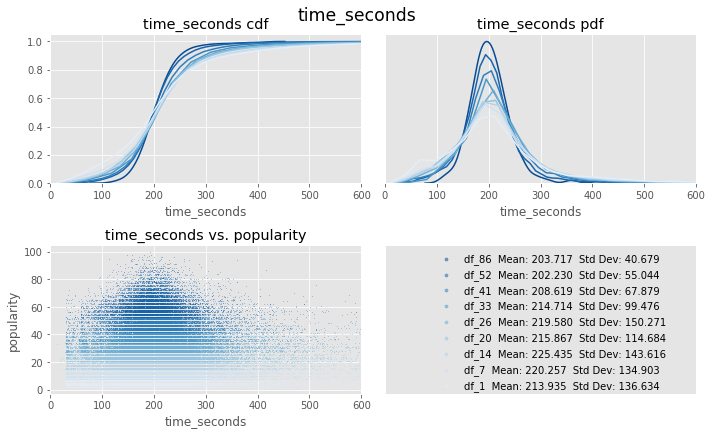

In [27]:
attribute = 'time_seconds'
against = 'popularity'
low, high = 0, 600
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png') 
;

### Acousticness

''

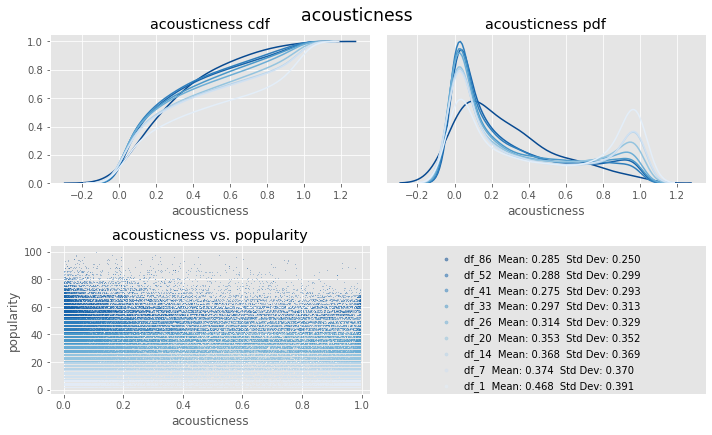

In [28]:
attribute = 'acousticness'
against = 'popularity'
low, high = None, None
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png')
;

### Danceability

''

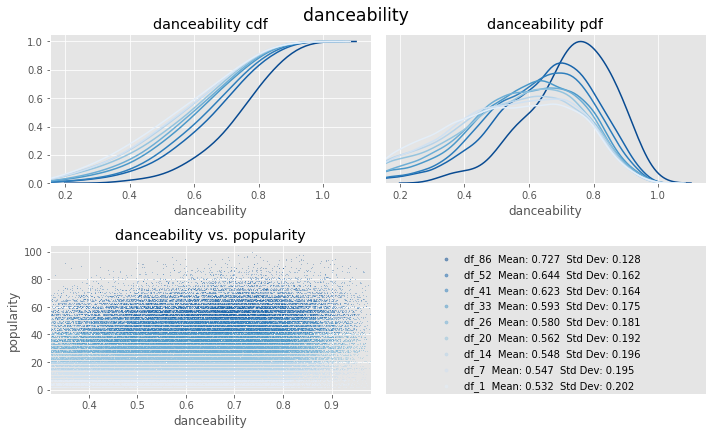

In [29]:
attribute = 'danceability'
against = 'popularity'
low, high = None, None
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png')   
;

### Energy

''

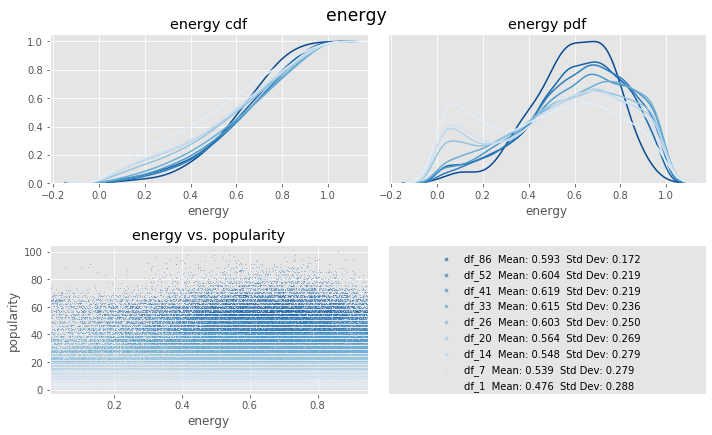

In [30]:
attribute = 'energy'
against = 'popularity'
low, high = None, None
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png')  
;

### Liveness

''

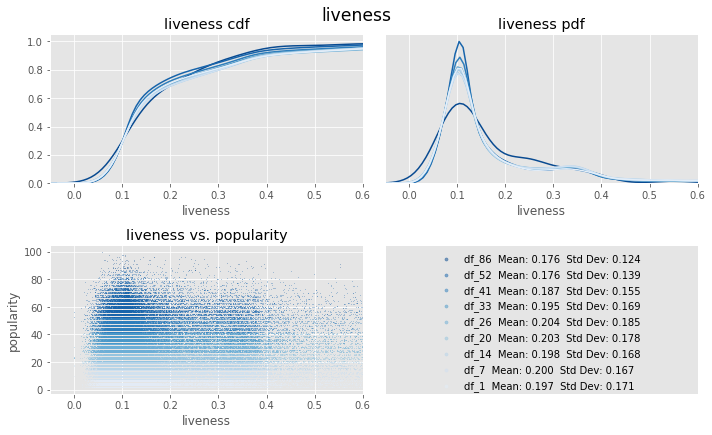

In [31]:
attribute = 'liveness'
against = 'popularity'
low, high = -0.05, 0.6
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png')  
;

### Loudness

''

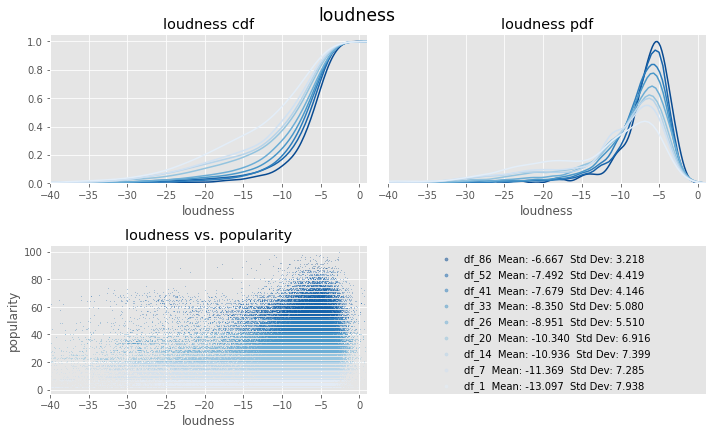

In [32]:
attribute = 'loudness'
against = 'popularity'
low, high = -40, 1
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png') 
;

### Tempo

''

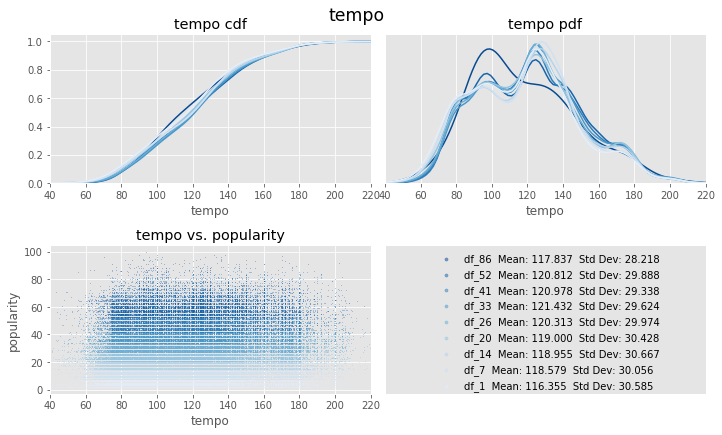

In [33]:
attribute = 'tempo'
against = 'popularity'
low, high = 40, 220
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png') 
;

### Valence

''

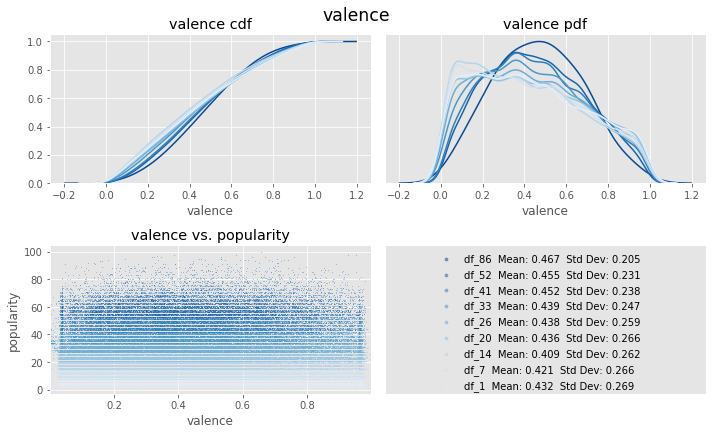

In [34]:
attribute = 'valence'
against = 'popularity'
low, high = None, None
fs = (10,6)
cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
# plt.savefig(f'{attribute}.png', format='png')    
;

### Spearman Correlation tests.  Song's attributes against popularity

In [35]:
dataset = df
against = 'popularity'
corr_list = ['time_seconds', 'acousticness', 'danceability', 
            'energy', 'liveness', 'loudness', 'tempo', 'valence']

for att in corr_list:
    cs1.spearman_correlation(dataset, att, against) 

time_seconds and popularity have a correlation of 0.001, with a p-value of 6.725e-01
acousticness and popularity have a correlation of -0.112, with a p-value of 1.072e-299
danceability and popularity have a correlation of 0.183, with a p-value of 0.000e+00
energy and popularity have a correlation of 0.136, with a p-value of 0.000e+00
liveness and popularity have a correlation of -0.022, with a p-value of 2.017e-13
loudness and popularity have a correlation of 0.274, with a p-value of 0.000e+00
tempo and popularity have a correlation of 0.043, with a p-value of 5.682e-46
valence and popularity have a correlation of 0.054, with a p-value of 8.011e-72


''

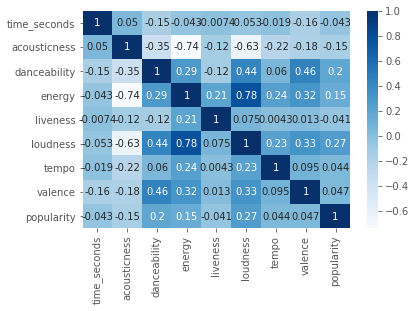

In [36]:
corr_list = ['time_seconds', 'acousticness', 'danceability', 
            'energy', 'liveness', 'loudness', 'tempo', 'valence', 'popularity']

cs1.plot_correlations(df, corr_list)
# plt.savefig(f'{attribute}.png', format='png')
;

''

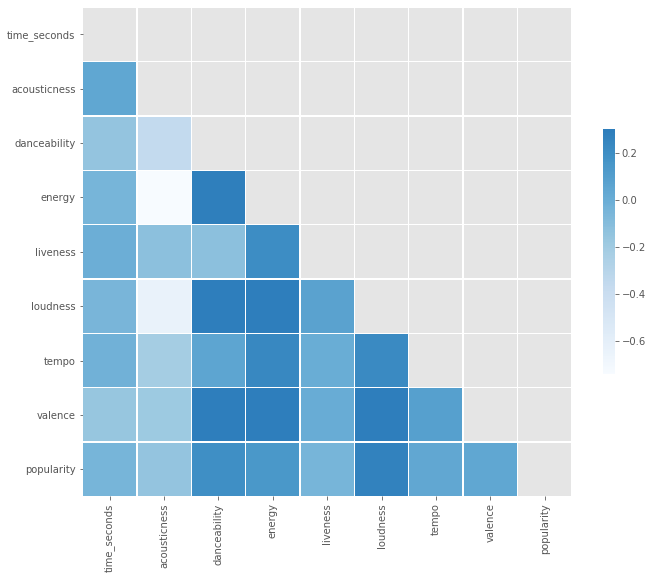

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(f'attribute_heat_map.png', format='png')
;

### Let's explore loudness further.  I am curious how danceability and energy relate to loudness.

In [44]:
loudness = df.copy().sort_values('loudness', ascending=False)

In [45]:
loudness

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
24318,araabMUZIK,7C2CdEAO8IkQSDqQr3ErKn,Bass,182,0.044900,0.347,0.892,0.9010,1.806,81.580,0.435,16
23640,araabMUZIK,5d8xflcaLXjJVElSEKEJSy,Lalalala,246,0.210000,0.354,0.997,0.5940,1.187,98.522,0.409,15
69314,Mefjus,4unRu4ammv55BfFen5KkSv,Together,284,0.001480,0.433,0.973,0.1070,0.738,171.973,0.146,31
40710,Subtronics,3E5IBYXIlLaegcOWzd4CXu,Thermal Expansion,212,0.066000,0.857,0.978,0.1080,0.681,145.031,0.389,28
91637,Jarvis,6AwbfviKqXyAgMt50VNDBL,Ready 2 Party,232,0.000327,0.642,0.960,0.0526,0.679,150.002,0.716,13
...,...,...,...,...,...,...,...,...,...,...,...,...
55557,Old Bike,5IOoDlyOTBGClrDRO8aZuw,All Falls Down,132,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,23
71072,Old Bike,0Lkwk8rd0gL1XHp1QBPE6c,Don't Mind,130,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,24
50315,Old Bike,1yPXig0m7bQIQ8UixN8lOJ,Khaki Pants,196,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,24
55558,Old Bike,3R4lLd6cPNhwKQvcI30hhp,This Is Me,116,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,24


In [46]:
lmask_0 = loudness['loudness'] > -0.7
lmask_5 = (loudness['loudness'] > -5.05) & (loudness['loudness'] <= -0.7)
lmask_7 = (loudness['loudness'] > -6.7) & (loudness['loudness'] <= -5.05)
lmask_9 = (loudness['loudness'] > -8.8) & (loudness['loudness'] <= -6.7)
lmask_13 = (loudness['loudness'] > -12.5) & (loudness['loudness'] <= -8.8)
lmask_35 = (loudness['loudness'] > -35) & (loudness['loudness'] <= -12.5)
# lmask_60 = (loudness['loudness'] > -60) & (loudness['loudness'] <= -35)


In [47]:
ldf_0 = loudness[lmask_0]
ldf_5 = loudness[lmask_5]
ldf_7 = loudness[lmask_7]
ldf_9 = loudness[lmask_9]
ldf_13 = loudness[lmask_13]
ldf_35 = loudness[lmask_35]
# ldf_60 = loudness[lmask_60]

In [48]:
ldf_lst = [ldf_0, ldf_5, ldf_7, ldf_9, ldf_13, ldf_35]
ldf_name_lst = ['ldf_0', 'ldf_5', 'ldf_7', 'ldf_9', 'lmask_13', 'ldf_35']

In [49]:
for df_, name in zip(ldf_lst, ldf_name_lst):
    print(f'{name}: Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 106040)*100, 2)}%\n')

ldf_0: Songs:135 
	 Percent:0.13%

ldf_5: Songs:20439 
	 Percent:19.27%

ldf_7: Songs:21569 
	 Percent:20.34%

ldf_9: Songs:22188 
	 Percent:20.92%

lmask_13: Songs:21312 
	 Percent:20.1%

ldf_35: Songs:22220 
	 Percent:20.95%



### Energy

energy and loudness have a correlation of 0.774, with a p-value of 0.000e+00


''

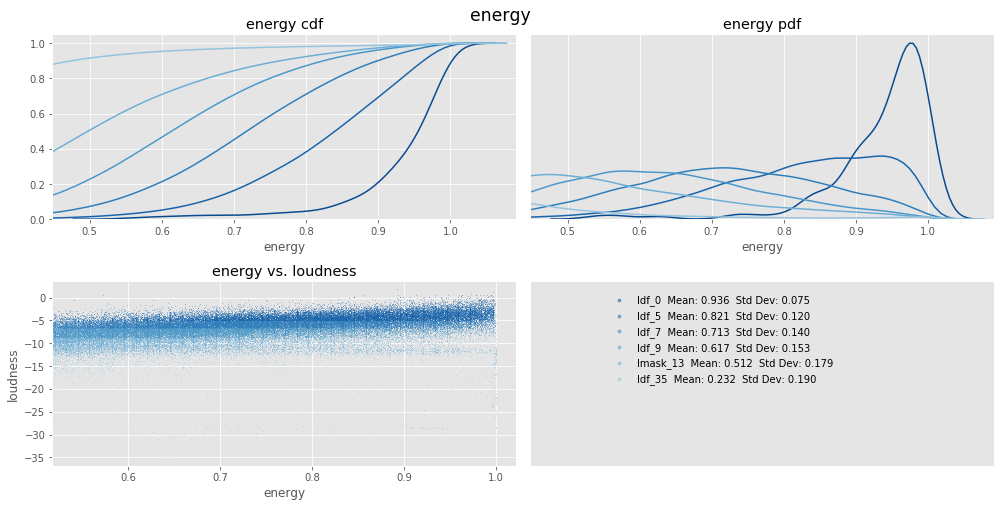

In [50]:
attribute = 'energy'
against = 'loudness'
low, high = None, None
fs = (14,7)

cs1.master_plotter(ldf_lst, ldf_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
cs1.spearman_correlation(df, attribute, against)
;

### Danceability

danceability and loudness have a correlation of 0.296, with a p-value of 0.000e+00


''

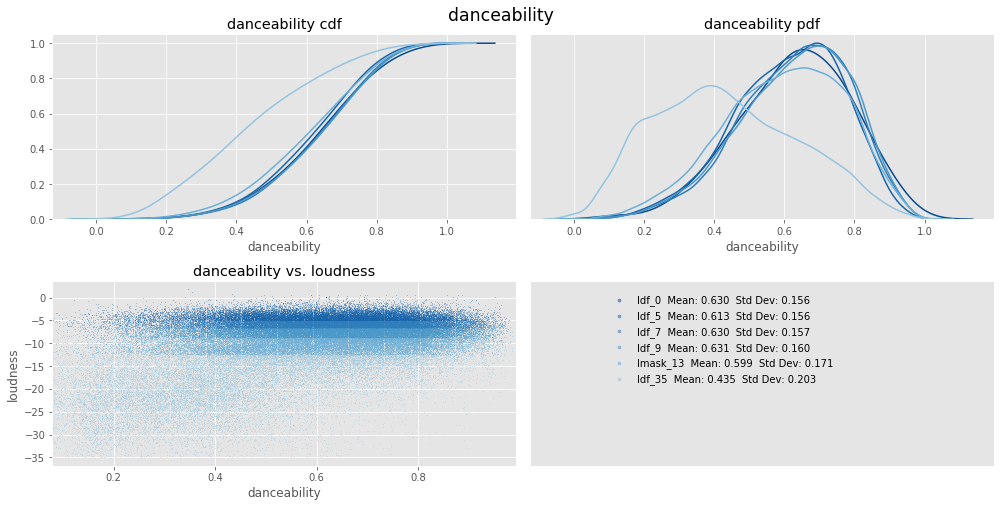

In [51]:
attribute = 'danceability'
against = 'loudness'
low, high = None, None
fs = (14,7)

cs1.master_plotter(ldf_lst, ldf_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
cs1.spearman_correlation(df, attribute, against)
;